## Introduction

The dataset is of 0-9 digits converted from image to input features, every row
represents a specific digit image along with labels for every row.
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

### [Dataset](https://drive.google.com/drive/folders/1ibzHff2uS4hUbTHI1fxihaDscA028aWm?usp=sharing)

### Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [2]:
df = pd.read_csv("digit_svm.csv")
df.shape

(42000, 785)

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Analyse the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
list(np.sort(df["label"].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<AxesSubplot:xlabel='label', ylabel='count'>

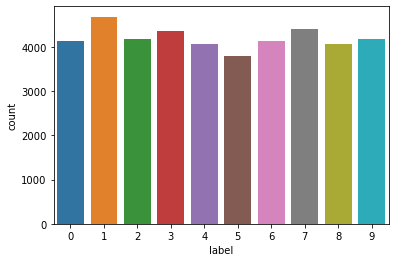

In [42]:
sns.countplot(df.iloc[:,0])

### Plotting the labels

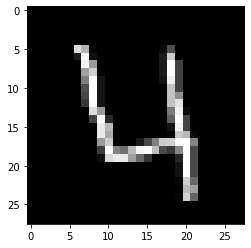

In [8]:
four = df.iloc[3,1:].values
four = four.reshape(28,28)
plt.imshow(four,cmap="gray")

### Plotting first ten labels

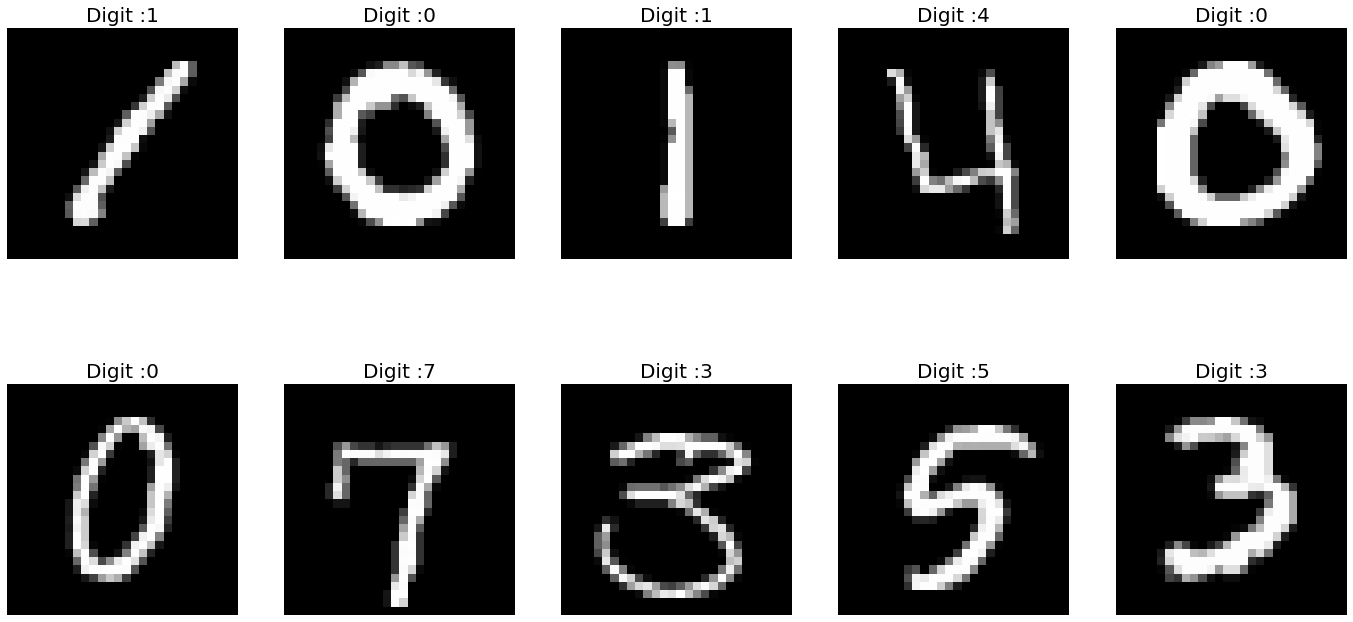

In [9]:
fig,axes = plt.subplots(2,5,figsize=(24,12))
for i in range(10):
    num = df.iloc[i,1:].values.reshape(28,28)
    ax = axes[i//5][i%5]
    ax.imshow(num,cmap="gray")
    ax.axis("off")
    ax.set_title("Digit :" + str(df.iloc[i][0]),size=20)

### Slice the data into features and label

In [10]:
x=df.iloc[:,1:].values
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
y=df.iloc[:,0].values
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

### Split the data into training and testing datasets 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

### Features scaling and normalisation

In [14]:
from sklearn.preprocessing import StandardScaler,normalize

In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_train = normalize(x_train)
x_test = normalize(x_test)

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_model = LogisticRegression(solver="lbfgs")

In [29]:
log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_test)
y_pred

array([3, 6, 9, ..., 4, 0, 5], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score

**Accuracy**

In [31]:
print("Accuracy : ",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy :  92.11 %


### SVM Classifier Linear

In [83]:
from sklearn.svm import SVC

In [84]:
svc = SVC(kernel="linear",random_state=0)

In [85]:
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [86]:
y_pred_svc = svc.predict(x_test)

**Accuracy**

In [87]:
print("Accuracy : ",round(accuracy_score(y_test,y_pred_svc)*100,2),"%")

Accuracy :  94.0 %


### SVM Classifier RBF

In [88]:
svc_rbf = SVC(kernel="rbf",random_state=0)

In [89]:
svc_rbf.fit(x_train,y_train)

SVC(random_state=0)

In [90]:
y_pred_svc_rbf = svc_rbf.predict(x_test)

**Accuracy**

In [91]:
print("Accuracy : ",round(accuracy_score(y_test,y_pred_svc_rbf)*100,2),"%")

Accuracy :  96.92 %


### GridSearchCV - Hyperparameters Tuning

In [95]:
from sklearn.model_selection import GridSearchCV,KFold

In [98]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

params_grid = [{'C': [5,10]}, {'gamma': [0.01, 0.001, 0.0001]}]

model = SVC(kernel="rbf")

In [99]:
grid = GridSearchCV(estimator = model,param_grid = params_grid ,scoring = "accuracy", cv = folds, verbose=1,n_jobs=-1)

In [100]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 117.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [5, 10]}, {'gamma': [0.01, 0.001, 0.0001]}],
             scoring='accuracy', verbose=1)

In [101]:
grid.best_params_

{'C': 10}

In [111]:
grid.best_estimator_

SVC(C=10)

**Accuracy**

In [115]:
grid.best_score_

0.9705396825396825

#### GridSearchCV Results

In [118]:
gridCV_results = pd.DataFrame(grid.cv_results_)
gridCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,379.212713,3.048230,123.835683,0.963730,5,NaN,{'C': 5},0.966032,0.968730,0.973333,0.974444,0.970000,0.970508,0.003064,2
1,377.538714,3.541494,124.152143,0.848516,10,NaN,{'C': 10},0.966508,0.968730,0.973175,0.973810,0.970476,0.970540,0.002726,1
2,1339.778451,3.607458,478.140976,1.543526,NaN,0.01,{'gamma': 0.01},0.901270,0.893810,0.905238,0.905556,0.902540,0.901683,0.004255,3
3,3527.798644,289.568056,355.098384,39.584919,NaN,0.001,{'gamma': 0.001},0.753175,0.747302,0.741429,0.749683,0.752381,0.748794,0.004227,4
4,2898.059073,839.044144,206.808761,37.991552,NaN,0.0001,{'gamma': 0.0001},0.108095,0.110317,0.112381,0.112063,0.111746,0.110921,0.001579,5


### Best Model

In [103]:
best_model = grid.best_estimator_

In [105]:
y_pred_best = best_model.predict(x_test)

**Accuracy**

In [119]:
print("Accuracy : ",round(accuracy_score(y_test,y_pred_best)*100,2),"%")

Accuracy :  97.18 %


### Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtc = DecisionTreeClassifier()

In [34]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred_dtc = dtc.predict(x_test)

**Accuracy**

In [36]:
print("Accuracy : ",round(accuracy_score(y_test,y_pred_dtc)*100,2),"%")

Accuracy :  83.69 %


### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators=80,max_depth= 20)

In [39]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=80)

In [40]:
y_pred_rfc = rfc.predict(x_test)

**Accuracy**

In [41]:
print("Accuracy : ",round(accuracy_score(y_test,y_pred_rfc)*100,2),"%")

Accuracy :  95.15 %


### K Nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knc = KNeighborsClassifier(n_neighbors=1)

In [29]:
knc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
y_pred_knc = knc.predict(x_test)

**Accuracy**

In [31]:
print("Accuracy : ",round(accuracy_score(y_test,y_pred_knc)*100,2),"%")

Accuracy :  93.9 %


In [52]:
ms = { "Model"  : ["Logistic Regression", "SVM Classifier Linear", "SVC Classifier RBF", "GridSearchCV Model", 
                   "Decision Tree Classifier", "Random Forest Classifier", "K Nearest Neighbors"], 
       "Accuracy" : [92.11, 94.0, 96.92, 97.18, 83.75, 95.21, 93.90]
     }

model_scores = pd.DataFrame(data=ms)

In [57]:
model_scores.sort_values(by="Accuracy",ascending=False)

,Model,Accuracy
3,GridSearchCV Model,97.18
2,SVC Classifier RBF,96.92
5,Random Forest Classifier,95.21
1,SVM Classifier Linear,94.00
6,K Nearest Neighbors,93.90
0,Logistic Regression,92.11
4,Decision Tree Classifier,83.75


From this observations, we have found for this particular dataset SVM Classifier predicted the digits using GridSearchCV for hyper parameters tuning with highest accuracy compared to other classifiers.